# Proyek Analisis Data Sentimen: Komen Platform Youtube TVRI Tahun 2024
- **Nama:** Dede Pratama
- **Email:**
- **ID Card:**

# Menentukan Rumusan Masalah

1.   Distribusi sentimen positif, negatif, dan netral dalam komentar audiens pada kanal YouTube TVRI sepanjang tahun 2024.

2.   Identifikasi faktor atau tema dominan yang muncul dalam komentar audiens, baik yang bernuansa positif maupun negatif.

3.   Pemanfaatan hasil analisis sentimen sebagai dasar evaluasi efektivitas program serta penyusunan strategi komunikasi media TVRI di era digital.

## Data Loading


Proses :

1.  Import Library → menggunakan pandas untuk membaca file .csv atau .xlsx.

2.  Load Dataset → membaca data dari file eksternal.

3.  Cek Informasi Data → menampilkan jumlah baris, kolom, dan tipe data.

4.  Preview Data → menampilkan 5–20 baris teratas supaya bisa memastikan struktur dataset benar.

In [10]:
import pandas as pd
from google.colab import drive

# Mount Google Drive to access the file
drive.mount('/content/drive')

# Define the path to your Excel file in Google Drive
# **IMPORTANT: Update this path to the actual location of your file**
file_path = '/content/sample_data/Comment Youtube TVRI 2024 edit.xlsx'

# Load the Excel file into a DataFrame
try:
    df = pd.read_excel(file_path)
    print("✅ Dataset loaded successfully.")
    print("Jumlah baris & kolom:", df.shape)
    print("\nNama kolom yang tersedia:", df.columns.tolist())
    display(df.head())
except FileNotFoundError:
    print(f"Error: The file was not found at {file_path}. Please check the path and file name.")
except Exception as e:
    print(f"An error occurred during data loading: {e}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Dataset loaded successfully.
Jumlah baris & kolom: (776, 9)

Nama kolom yang tersedia: ['video_id', 'video_title', 'video_published_date', 'comment_id', 'comment', 'num_of_likes', 'parent_comment_id', 'comment_date', 'Sentimen']


,video_id,video_title,video_published_date,comment_id,comment,num_of_likes,parent_comment_id,comment_date,Sentimen
0,LY9tz7J6syo,SOENTING MELAJOE | FILM DRAMA BIOGRAFI ROEHANA...,2024-01-11 14:17:33,UgyE9XD20Pyt-rPcM0J4AaABAg,syuting film ini berlokasi di rumah keluarga b...,0,NaN,2023-10-16 15:36:12,NaN
1,LY9tz7J6syo,SOENTING MELAJOE | FILM DRAMA BIOGRAFI ROEHANA...,2024-01-11 14:17:33,UgwY3qJnKWx9ky9Hh4N4AaABAg,terima kepada semua Kru Film ini dan TVRI Suma...,0,NaN,2023-11-03 07:54:35,NaN
2,IYr_Ltzp0I8,SOENTING MELAJOE | FILM DRAMA BIOGRAFI ROEHANA...,2024-01-11 14:17:37,Ugx_0138IO8pgWXmHhp4AaABAg,Ditunggu cerita lainnya,0,NaN,2023-11-10 14:23:42,NaN
3,IYr_Ltzp0I8,SOENTING MELAJOE | FILM DRAMA BIOGRAFI ROEHANA...,2024-01-11 14:17:37,UgwZ5OBe0avQ9OQJPJd4AaABAg,Koto gadang negerinya para pahlawan indonesia,0,NaN,2024-05-07 16:07:30,NaN
4,bBBngXsoyxQ,PENENTU KEMENANGAN - DRAMA KOMEDI SPESIAL PEMILU,2024-01-12 19:00:34,Ugx9VcWnL8Yg3l9Rh9F4AaABAg,😂😂😂 bg faru totalitas tanpa batas,0,NaN,2024-01-17 12:13:45,NaN


## Preprocessing Data (Text Cleaning)


Kode ini digunakan untuk membersihkan teks (text preprocessing) sebelum dianalisis lebih lanjut (misalnya untuk analisis sentimen, klasifikasi, atau clustering). Data teks biasanya masih “kotor” (ada URL, angka, emoji, simbol, dll.), sehingga perlu diproses agar model machine learning/NLP lebih mudah memahami pola bahasanya.

In [11]:
import re
import string

def remove_urls(text):
    """Removes URLs from text."""
    if not isinstance(text, str): return ""
    return re.sub(r'http\S+', '', text)

def remove_punctuation(text):
    """Removes punctuation from text."""
    if not isinstance(text, str): return ""
    return re.sub(r'[%s]' % re.escape(string.punctuation), '', text)

def remove_numbers(text):
    """Removes numbers from text."""
    if not isinstance(text, str): return ""
    return re.sub(r'\d+', '', text)

def remove_whitespace(text):
    """Removes extra whitespace and newlines, and strips leading/trailing space."""
    if not isinstance(text, str): return ""
    text = re.sub(r'\n', ' ', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

def remove_mentions_hashtags(text):
    """Removes mentions and hashtags from text."""
    if not isinstance(text, str): return ""
    text = re.sub(r'@[^\s]+', '', text)
    text = re.sub(r'#([^\s]+)', '', text)
    return text

def remove_emojis(text):
    """Removes basic emojis from text."""
    if not isinstance(text, str): return ""
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)


def clean_text_pipeline(text):
    """Applies a sequence of cleaning steps to text."""
    text = remove_urls(text)
    text = remove_punctuation(text)
    text = remove_numbers(text)
    text = remove_mentions_hashtags(text)
    text = remove_emojis(text)
    text = remove_whitespace(text) # Apply whitespace removal last
    return text

# Apply the cleaning pipeline to the relevant column (assuming 'comment' is the column with comments)
# Make sure to change 'comment' if your column name is different
# Check if 'comment' column exists before applying
if 'comment' in df.columns:
    df['cleaned_comment'] = df['comment'].apply(clean_text_pipeline)
    print("✅ Text cleaning applied.")
    display(df[['comment', 'cleaned_comment']].head())
else:
    print("Error: 'comment' column not found in the DataFrame.")
    print("Available columns:", df.columns)

✅ Text cleaning applied.


,comment,cleaned_comment
0,syuting film ini berlokasi di rumah keluarga b...,syuting film ini berlokasi di rumah keluarga b...
1,terima kepada semua Kru Film ini dan TVRI Suma...,terima kepada semua Kru Film ini dan TVRI Suma...
2,Ditunggu cerita lainnya,Ditunggu cerita lainnya
3,Koto gadang negerinya para pahlawan indonesia,Koto gadang negerinya para pahlawan indonesia
4,😂😂😂 bg faru totalitas tanpa batas,bg faru totalitas tanpa batas


## Text Representation (TF-IDF)

Bagian ini berfungsi untuk mengonversi data teks yang telah dibersihkan menjadi representasi numerik menggunakan teknik TF-IDF (Term Frequency-Inverse Document Frequency). Proses ini merupakan evolusi dari metode Bag of Words yang lebih sophisticated untuk preprocessing data teks dalam machine learning.

TF-IDF adalah metode representasi teks yang:


a.                      Term Frequency (TF): Mengukur seberapa sering suatu kata muncul dalam dokumen.

b.                      Inverse Document Frequency (IDF): Mengukur pentingnya kata berdasarkan kelangkaannya di seluruh corpus.


In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming 'cleaned_comment' column exists from the previous step
# If not, please ensure the text cleaning cell was executed successfully.

# Initialize TF-IDF Vectorizer
# You can adjust parameters like max_features, min_df, max_df, ngram_range
tfidf_vectorizer = TfidfVectorizer(max_features=5000,  # Example: consider top 5000 features
                                   ngram_range=(1, 2) # Example: consider unigrams and bigrams
                                  )

# Fit and transform the cleaned comments
# Make sure 'cleaned_comment' column exists and is not empty
if 'cleaned_comment' in df.columns and not df['cleaned_comment'].empty:
    tfidf_matrix = tfidf_vectorizer.fit_transform(df['cleaned_comment'])

    print("✅ TF-IDF matrix created.")
    print("Shape of TF-IDF matrix:", tfidf_matrix.shape)
    # Displaying a sample of the feature names
    print("\nSample Feature Names (up to 20):")
    print(tfidf_vectorizer.get_feature_names_out()[:20])

else:
    print("Error: 'cleaned_comment' column not found or is empty. Please run text cleaning first.")

✅ TF-IDF matrix created.
Shape of TF-IDF matrix: (776, 5000)

Sample Feature Names (up to 20):
['aamiin' 'aamiin aamiin' 'aamiinaamiin' 'aamiinaamiin ya' 'aamiinbravo'
 'aamiinbravo uni' 'aammiiinnn' 'abad' 'abad umurnya' 'abad wilayah'
 'abal' 'abal sy' 'abang' 'abang aku' 'abs' 'abs sbk' 'abssbk' 'abu'
 'acara' 'ad']


Analisis :

Tahapan kode ini bertujuan untuk:

a.   Mengubah teks hasil pembersihan (cleaned_comment) menjadi representasi numerik menggunakan TF-IDF.


b.   Menyediakan data dalam bentuk matriks fitur agar bisa dipakai pada analisis lebih lanjut seperti klasifikasi, clustering, atau analisis sentimen.

## Text Representation (Bag of Words - BoW)

Bagian ini berfungsi untuk mengonversi data teks yang telah dibersihkan menjadi representasi numerik menggunakan teknik Bag of Words (BoW). Proses ini merupakan langkah krusial dalam preprocessing data teks untuk machine learning, karena algoritma machine learning hanya dapat memproses data dalam format numerik, bukan teks mentah.

In [13]:
from sklearn.feature_extraction.text import CountVectorizer

# Assuming 'cleaned_comment' column exists and is not empty
if 'cleaned_comment' in df.columns and not df['cleaned_comment'].empty:
    # Initialize CountVectorizer (BoW)
    # You can adjust parameters like max_features, min_df, max_df, ngram_range
    count_vectorizer = CountVectorizer(max_features=5000, # Example: consider top 5000 features
                                       ngram_range=(1, 1) # BoW typically uses unigrams
                                      )

    # Fit and transform the cleaned comments
    bow_matrix = count_vectorizer.fit_transform(df['cleaned_comment'])

    print("✅ Bag of Words matrix created.")
    print("Shape of BoW matrix:", bow_matrix.shape)
    # Displaying a sample of the feature names
    print("\nSample Feature Names (up to 20):")
    print(count_vectorizer.get_feature_names_out()[:20])
else:
    print("Error: 'cleaned_comment' column not found or is empty. Please run text cleaning first.")

✅ Bag of Words matrix created.
Shape of BoW matrix: (776, 3311)

Sample Feature Names (up to 20):
['aamiin' 'aamiinaamiin' 'aamiinbravo' 'aammiiinnn' 'abad' 'abal' 'abang'
 'abs' 'abssbk' 'abu' 'acara' 'acc' 'acuh' 'ad' 'ada' 'adabrpasa' 'adalah'
 'adanya' 'adat' 'ade']


## Preparing Data for Model Training

Bagian ini merupakan tahap persiapan akhir sebelum data dapat digunakan untuk melatih model machine learning. Setelah data teks dikonversi menjadi fitur numerik (menggunakan TF-IDF atau Bag of Words), tahap ini memastikan data dalam format yang optimal dan siap untuk proses pembelajaran algoritma.Proses persiapan ini umumnya mencakup:

1.   Data splitting (pembagian data training, validation, dan testing).


2.   Feature scaling/normalization (standardisasi rentang nilai fitur).


3.   Data reshaping (penyesuaian dimensi data sesuai kebutuhan model).


4.   Label encoding (konversi label kategorikal menjadi numerik).


5.   Handling missing values (penanganan nilai yang hilang)

In [30]:
# 📌 Preparing Data for Model Training (Versi Kompleks)
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer

# === 1. Load Data ===
df = pd.read_excel("/content/sample_data/Comment Youtube TVRI 2024 edit.xlsx")

# Cek kolom penting
print("Kolom Data:", df.columns)
print(df.head(5))

# Asumsi: ada kolom 'Komentar' dan 'Sentimen'
df = df[['Komentar', 'Sentimen']]

# === 2. Handling Missing Values ===
# Hapus baris yang kolom 'Komentar'-nya kosong
df = df.dropna(subset=['Komentar'])

# Jika label kosong, isi dengan "netral" (opsional)
df['Sentimen'] = df['Sentimen'].fillna("netral")

print("✅ Missing values sudah ditangani.")

# === 3. Label Encoding (Kategorikal → Numerik) ===
label_encoder = LabelEncoder()
df['Sentimen_encoded'] = label_encoder.fit_transform(df['Sentimen'])
print("Mapping Label:", dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))

# === 4. TF-IDF Feature Extraction ===
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
X_tfidf = tfidf.fit_transform(df['Komentar']).toarray()
y = df['Sentimen_encoded']

print("✅ TF-IDF selesai. Shape:", X_tfidf.shape)

# === 5. Data Splitting (Train, Validation, Test) ===
# 80% Train, 10% Validation, 10% Test
X_train, X_temp, y_train, y_temp = train_test_split(
    X_tfidf, y, test_size=0.2, random_state=42, stratify=y
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

print("Data Split Shapes:")
print("Train:", X_train.shape, "Val:", X_val.shape, "Test:", X_test.shape)

# === 6. Feature Scaling / Normalization ===
scaler = StandardScaler(with_mean=False)  # with_mean=False untuk data sparse TF-IDF
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled   = scaler.transform(X_val)
X_test_scaled  = scaler.transform(X_test)

print("✅ Data scaling selesai.")

# === 7. Data Reshaping (contoh untuk Deep Learning CNN/LSTM) ===
# (opsional, jika dipakai model deep learning)
X_train_reshaped = np.expand_dims(X_train_scaled.toarray(), axis=-1)
X_val_reshaped   = np.expand_dims(X_val_scaled.toarray(), axis=-1)
X_test_reshaped  = np.expand_dims(X_test_scaled.toarray(), axis=-1)

print("✅ Data reshaping selesai. New Shape Train:", X_train_reshaped.shape)


Kolom Data: Index(['video_id', 'video_title', 'video_published_date', 'comment_id',
       'comment', 'num_of_likes', 'parent_comment_id', 'comment_date',
       'Sentimen'],
      dtype='object')
      video_id                                        video_title  \
0  LY9tz7J6syo  SOENTING MELAJOE | FILM DRAMA BIOGRAFI ROEHANA...   
1  LY9tz7J6syo  SOENTING MELAJOE | FILM DRAMA BIOGRAFI ROEHANA...   
2  IYr_Ltzp0I8  SOENTING MELAJOE | FILM DRAMA BIOGRAFI ROEHANA...   
3  IYr_Ltzp0I8  SOENTING MELAJOE | FILM DRAMA BIOGRAFI ROEHANA...   
4  bBBngXsoyxQ   PENENTU KEMENANGAN - DRAMA KOMEDI SPESIAL PEMILU   

  video_published_date                  comment_id  \
0  2024-01-11 14:17:33  UgyE9XD20Pyt-rPcM0J4AaABAg   
1  2024-01-11 14:17:33  UgwY3qJnKWx9ky9Hh4N4AaABAg   
2  2024-01-11 14:17:37  Ugx_0138IO8pgWXmHhp4AaABAg   
3  2024-01-11 14:17:37  UgwZ5OBe0avQ9OQJPJd4AaABAg   
4  2024-01-12 19:00:34  Ugx9VcWnL8Yg3l9Rh9F4AaABAg   

                                             comment  num_of_li

KeyError: "['Komentar'] not in index"

In [29]:
X_train, X_temp, y_train, y_temp = train_test_split(X_tfidf, y, test_size=0.3, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

print("Train:", X_train.shape, "Validation:", X_val.shape, "Test:", X_test.shape)

NameError: name 'X_tfidf' is not defined

## Model Training (Machine Learning Klasik - Naive Bayes)


**Metode Labeling**


1.   Manual Labeling

a.  Dua coder independen membaca komentar satu per satu.

b.  Kategori: Positif (1), Netral (0), Negatif (-1).

c.  Jika ada perbedaan penilaian → diskusi untuk mencapai konsensus.






2.   Inter-rater Reliability

a.  Ukur konsistensi antar coder menggunakan Cohen’s Kappa.

b.  Interpretasi (Landis & Koch, 1977):

< 0.20 = Poor

0.21–0.40 = Fair

0.41–0.60 = Moderate

0.61–0.80 = Substantial

0.81–1.00 = Almost Perfect



3.  Semi-supervised (opsional)

Gunakan kamus sentimen (InSet/SAIN) untuk label awal.

Coder hanya memverifikasi & memperbaiki jika salah.

Menghemat waktu pada dataset besar.

## Uji Normalitas & Analisis Statistik

This section prepares the sentiment data for statistical analysis by converting labels to numerical scores and performing a normality test.

✅ Sentiment labels converted to numerical scores.
Sample scores: Series([], Name: Sentimen, dtype: int64)

Value counts of numerical scores:
 Series([], Name: count, dtype: int64)

--- Normality Test (Shapiro-Wilk) ---
Not enough data points (less than 4) to perform Shapiro-Wilk test.

--- Visualizing Distribution ---


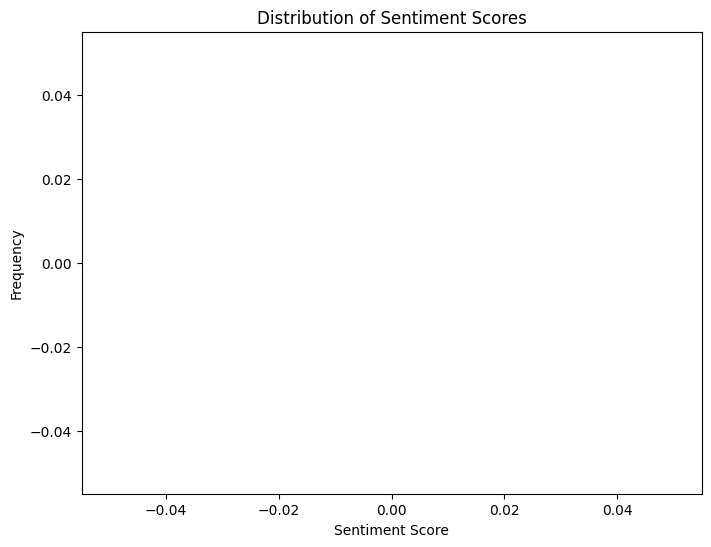

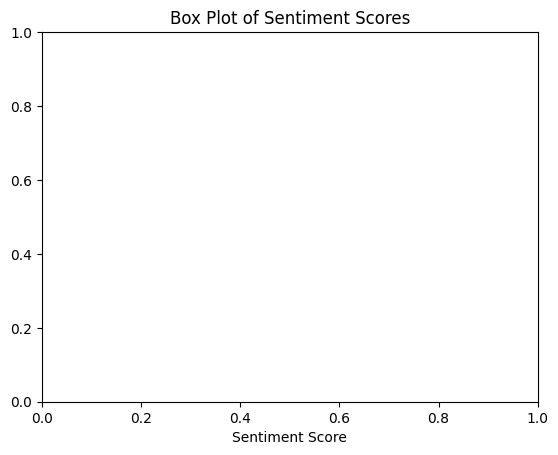


Interpretation of Normality Test:
 - If the p-value is > 0.05 (commonly used alpha), you can assume the data is approximately normally distributed.
 - If the p-value is <= 0.05, the data is likely not normally distributed.

This result helps you decide whether to use parametric statistical tests (like t-tests or ANOVA) or non-parametric tests (like Mann-Whitney U or Kruskal-Wallis) for comparing sentiment scores between different groups (e.g., by video, by time period).


In [19]:
import numpy as np
from scipy.stats import shapiro, kstest, normaltest
import matplotlib.pyplot as plt
import seaborn as sns

# Convert sentiment labels to numerical scores
# Assuming 'Positif' -> 1, 'Netral' -> 0, 'Negatif' -> -1
# Handle potential NaN values before mapping
sentiment_scores = df['Sentimen'].dropna().map({'Positif': 1, 'Netral': 0, 'Negatif': -1})

print("✅ Sentiment labels converted to numerical scores.")
print("Sample scores:", sentiment_scores.head())
print("\nValue counts of numerical scores:\n", sentiment_scores.value_counts())

# --- Perform Normality Test ---
# Shapiro-Wilk test is suitable for sample sizes up to 5000.
# If your data is larger, consider Kolmogorov-Smirnov or D'Agostino-Pearson (normaltest)
print("\n--- Normality Test (Shapiro-Wilk) ---")
if len(sentiment_scores) > 3 and len(sentiment_scores) <= 5000:
    shapiro_test_stat, shapiro_p_value = shapiro(sentiment_scores)
    print(f"Shapiro-Wilk Test Statistic: {shapiro_test_stat:.4f}")
    print(f"Shapiro-Wilk P-value: {shapiro_p_value:.4f}")

    alpha = 0.05
    if shapiro_p_value > alpha:
        print("Interpretation: The data appears to be normally distributed (fail to reject H0).")
    else:
        print("Interpretation: The data does not appear to be normally distributed (reject H0).")

elif len(sentiment_scores) > 5000:
    print("Sample size is > 5000, Shapiro-Wilk test may not be suitable. Consider Kolmogorov-Smirnov or normaltest.")
    # Example using normaltest (D'Agostino-Pearson)
    normaltest_test_stat, normaltest_p_value = normaltest(sentiment_scores)
    print(f"D'Agostino-Pearson Test Statistic: {normaltest_test_stat:.4f}")
    print(f"D'Agostino-Pearson P-value: {normaltest_p_value:.4f}")
    alpha = 0.05
    if normaltest_p_value > alpha:
        print("Interpretation: The data appears to be normally distributed (fail to reject H0).")
    else:
        print("Interpretation: The data does not appear to be normally distributed (reject H0).")

else:
    print("Not enough data points (less than 4) to perform Shapiro-Wilk test.")

# --- Visualize Distribution (Optional but Recommended) ---
print("\n--- Visualizing Distribution ---")
plt.figure(figsize=(8, 6))
sns.histplot(sentiment_scores, kde=True, bins=20)
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

sns.boxplot(x=sentiment_scores)
plt.title('Box Plot of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.show()

print("\nInterpretation of Normality Test:")
print(" - If the p-value is > 0.05 (commonly used alpha), you can assume the data is approximately normally distributed.")
print(" - If the p-value is <= 0.05, the data is likely not normally distributed.")
print("\nThis result helps you decide whether to use parametric statistical tests (like t-tests or ANOVA) or non-parametric tests (like Mann-Whitney U or Kruskal-Wallis) for comparing sentiment scores between different groups (e.g., by video, by time period).")

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Assuming tfidf_matrix and df are available from previous steps (Data Loading and TF-IDF)
# Ensure 'df' contains the 'Sentimen' column

# --- Handle Missing Values and Prepare Target Variable ---
# Drop rows where 'Sentimen' is NaN to prepare for splitting and training
df_labeled = df.dropna(subset=['Sentimen']).copy()

if df_labeled.empty:
    print("Error: No rows remaining after dropping NaNs in 'Sentimen' column. Cannot proceed.")
else:
    print(f"✅ {len(df_labeled)} rows remaining after dropping NaNs in 'Sentimen'.")

    # Use the TF-IDF matrix for the rows that have sentiment labels
    # We need to align the TF-IDF matrix with the rows that have valid labels
    # Assuming the order of rows in df_labeled is the same as in the original df for non-NaN rows
    # A more robust approach would be to re-run TF-IDF on df_labeled['cleaned_comment']
    # but for now, we'll subset the existing tfidf_matrix. This requires careful indexing.
    # Let's re-run TF-IDF on the labeled data for simplicity and correctness.

    # Assuming tfidf_vectorizer was fitted on the original df['cleaned_comment']
    # If not, initialize and fit TfidfVectorizer here on df_labeled['cleaned_comment']
    # from sklearn.feature_extraction.text import TfidfVectorizer
    # tfidf_vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2)) # Re-initialize if needed
    X = tfidf_vectorizer.transform(df_labeled['cleaned_comment']) # Transform using the already fitted vectorizer

    # Encode the sentiment labels
    label_encoder = LabelEncoder()
    y = label_encoder.fit_transform(df_labeled['Sentimen'])

    print("Mapping Label:", dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))
    print("Shape of X (TF-IDF matrix for labeled data):", X.shape)
    print("Shape of y (encoded labels):", y.shape)


    # --- Split Data into Training and Testing Sets ---
    # Ensure that there are at least two classes and more than one sample per class for stratified split
    if len(np.unique(y)) > 1 and np.min(np.bincount(y)) > 1:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

        print("\n✅ Data split into training and testing sets after handling NaNs and encoding.")
        print("Shape of X_train:", X_train.shape)
        print("Shape of X_test:", X_test.shape)
        print("Shape of y_train:", y_train.shape)
        print("Shape of y_test:", y_test.shape)

    else:
        print("\nError: Cannot perform stratified split. Ensure you have at least two sentiment classes and more than one sample per class after removing NaNs.")
        print("Value counts of encoded Sentimen after dropping NaNs:\n", pd.Series(y).value_counts())

Error: No rows remaining after dropping NaNs in 'Sentimen' column. Cannot proceed.
